In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from numpy.random import seed

In [2]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for e in range(self.n_iter):
            print(e)
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                update = self.eta * (target - prediction)
                if target != prediction:
                    if target > 0:
                        print("target class:  ", str(target), " Prediction: ", str(prediction))
                    else:
                        print("target class: ", str(target), " Prediction: ", str(prediction))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta :  float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors,
            where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        
        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
       """Calculate net input"""
       return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
       """Compute linear activation"""
       return self.net_input(X)
    
    def predict(self, X):
       """Return class label after unit step"""
       return np.where(self.activation(X) >= 0.0, 1, -1)


In [4]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
       Learning rate (between 0.0 and 1.0)
    n_iter : int
       Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
       Weights after fitting.
    errors_ : list
       Number of misclassifications in every epoch.
    shuffle : bool (default: True)
       Shuffles training data every epoch
       if True to prevent cycles.
    random_state : int (default: None)
       Set random state for shuffling
       and initializing the weights.
    """

    def __init__(self, eta=0.01, n_iter=10,
        shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        """

        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [6]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

In [7]:
co2Data = pd.read_csv('/Users/jcoleman/Google Drive/ResearchElective_2/data/cleanedDataSet.csv')
newNames = list(co2Data.columns)
newNames[0] = 'unix'
co2Data.columns = newNames
co2Data.set_index('unix', inplace=True)
co2Data.head()

,Date (Rome),Time (Rome),# Occupants,Window Open,Door Open,DateTime (Rome),DateTime (Zulu),Unix (Nano),1,2,3,4,_mean
unix,,,,,,,,,,,,,
1510688160,11/14/2017,20:36:00,4,0,1,11/14/2017 20:36,11/14/2017 19:36,1.510690e+12,612.375000,619.333333,516.875000,564.958333,578.385417
1510699500,11/14/2017,23:45:00,4,0,1,11/14/2017 23:45,11/14/2017 22:45,1.510700e+12,531.555556,574.916667,450.500000,485.478261,510.612621
1510704600,11/15/2017,1:10:00,1,0,1,11/15/2017 1:10,11/15/2017 0:10,1.510700e+12,531.555556,520.083333,437.250000,481.500000,492.597222
1510761660,11/15/2017,17:01:00,3,0,1,11/15/2017 17:01,11/15/2017 16:01,1.510760e+12,434.200000,325.454545,425.909091,453.090909,409.663636
1510763820,11/15/2017,17:37:00,3,1,0,11/15/2017 17:37,11/15/2017 16:37,1.510760e+12,434.200000,325.454545,425.909091,453.090909,409.663636


In [8]:
# y = trh['Phenomenon'].values
# y = np.where(y == 'Humidity', -1, 1)
# X = np.array([trh['Hour of Day'],trh['Value']]).T
# X.shape

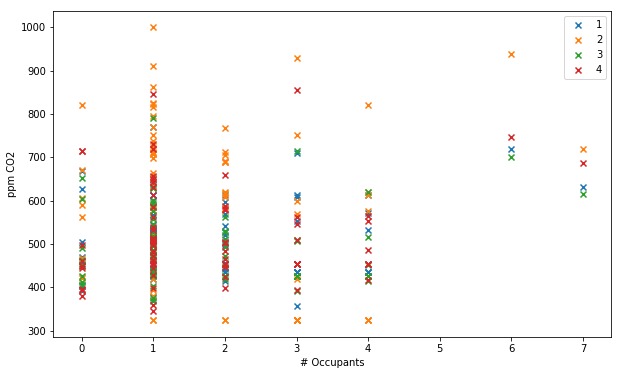

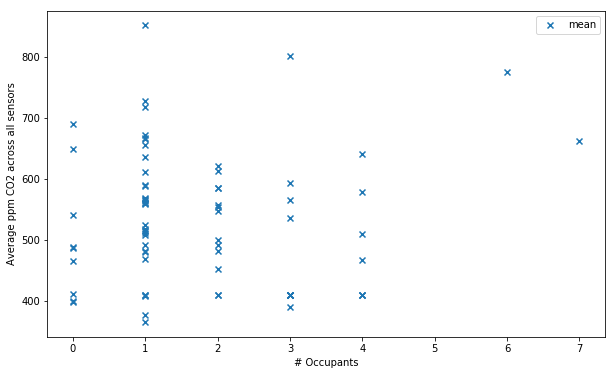

In [9]:
# Plot ppm CO2 vs occupancy
columnsToPlot = ['1','2','3','4']
for c in columnsToPlot:
    plt.scatter(x=co2Data['# Occupants'], y=co2Data[c], marker='x', label=c)
plt.xlabel('# Occupants')
plt.ylabel('ppm CO2')
plt.legend(loc='upper right')
plt.show()

# Investigating the correlation of mean ppm co2 and occupancy
plt.scatter(x=co2Data['# Occupants'], y=co2Data['_mean'], marker='x', label='mean')
plt.xlabel('# Occupants')
plt.ylabel('Average ppm CO2 across all sensors')
plt.legend(loc='upper right')
plt.show()

In [10]:
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

NameError: name 'X' is not defined

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [ ]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada = AdalineGD(n_iter=15, eta=0.1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [ ]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()